<a href="https://colab.research.google.com/github/rbiscuit/Assignment/blob/main/Survey_SentimentNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data_path = "/content/Cleaned_data.csv"
df = pd.read_csv(data_path)


In [ ]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to the 'describe' column in the 'df' DataFrame
df['sentiment_polarity'] = df['describe'].apply(get_sentiment_polarity)

# Classify sentiment labels based on polarity
df['sentiment_label'] = df['sentiment_polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the results
print(df[['describe', 'sentiment_polarity', 'sentiment_label']])

                                             describe  sentiment_polarity  \
0                                 Can't agree at work            0.000000   
1   We were working on a project, and an experimen...           -0.060000   
2   Disagreement about the process for input and t...            0.000000   
3   We were yelling at each other about something ...           -0.208333   
4   Decision to take on new, risky initiative (hig...            0.114091   
5   There was a class assignment that was due and ...           -0.162500   
6   This colleague felt that I was not delivering ...           -0.046875   
7   My manager didn't want to present an analysis ...            0.150000   
8   They did not do any work in a group project. E...            0.433333   
9                     Debate of FS reporting approach            0.000000   
10  Not meeting deadlines, always showing up late,...           -0.300000   
11  JK and I had a conflict on what need to done f...            0.214286   

In [ ]:
from scipy.stats import chi2_contingency

# Assuming 'other_column' is a categorical column in your DataFrame
categorical_column = 'initiator_type'

# Create a contingency table
contingency_table = pd.crosstab(df['sentiment_label'], df[categorical_column])

# Perform Chi-squared test
chi2_result = chi2_contingency(contingency_table)

# Print the test result
print("Chi-squared Test Result:")
print(chi2_result)

Chi-squared Test Result:
Chi2ContingencyResult(statistic=3.9989256198347114, pvalue=0.40615127078087765, dof=4, expected_freq=array([[ 7.33333333,  5.33333333,  3.33333333],
       [ 4.58333333,  3.33333333,  2.08333333],
       [10.08333333,  7.33333333,  4.58333333]]))


In [ ]:
from scipy.stats import f_oneway

# List of numerical columns
numerical_columns = ["feelings_youalone", "feelings_bothyoufirst", "feelings_themalone",
                   "feelings_boththemfirst", "feelings_neither", "feelings_youaloneforgiven"]

# Perform ANOVA test for each column
for column in numerical_columns:
    anova_result = f_oneway(df[df['sentiment_label'] == 'positive'][column],
                            df[df['sentiment_label'] == 'negative'][column],
                            df[df['sentiment_label'] == 'neutral'][column])

    # Print the test result for each column
    print(f"ANOVA Test Result for {column}:")
    print(anova_result)

ANOVA Test Result for feelings_youalone:
F_onewayResult(statistic=1.251849328273514, pvalue=0.29574301167072703)
ANOVA Test Result for feelings_bothyoufirst:
F_onewayResult(statistic=3.4736834001067596, pvalue=0.039545944380269205)
ANOVA Test Result for feelings_themalone:
F_onewayResult(statistic=0.18506080666820135, pvalue=0.8316830181350513)
ANOVA Test Result for feelings_boththemfirst:
F_onewayResult(statistic=0.11172918725603817, pvalue=0.8945337080448852)
ANOVA Test Result for feelings_neither:
F_onewayResult(statistic=0.6007397819990611, pvalue=0.5527441777819102)
ANOVA Test Result for feelings_youaloneforgiven:
F_onewayResult(statistic=0.46955873375694235, pvalue=0.6283071265157164)


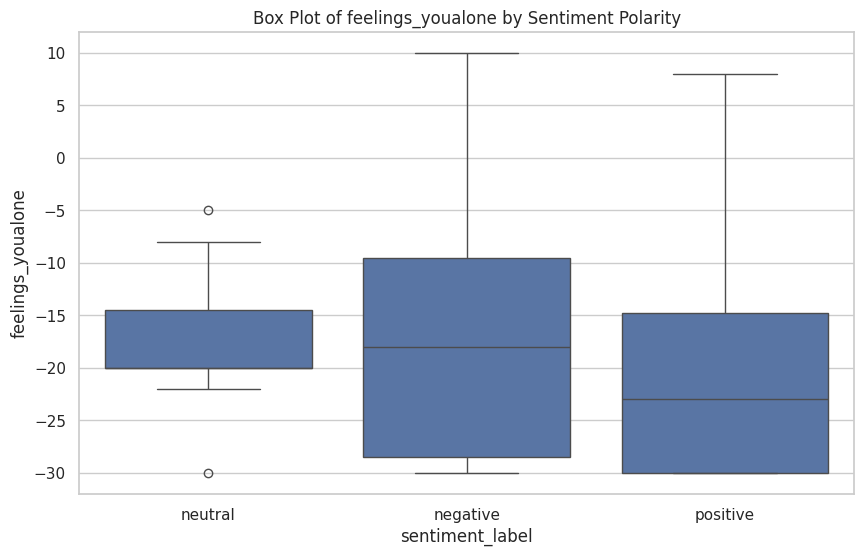

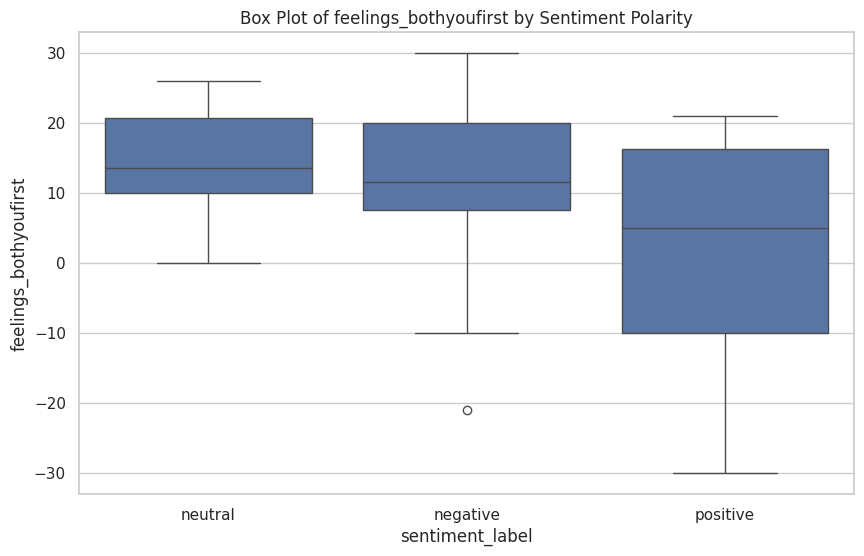

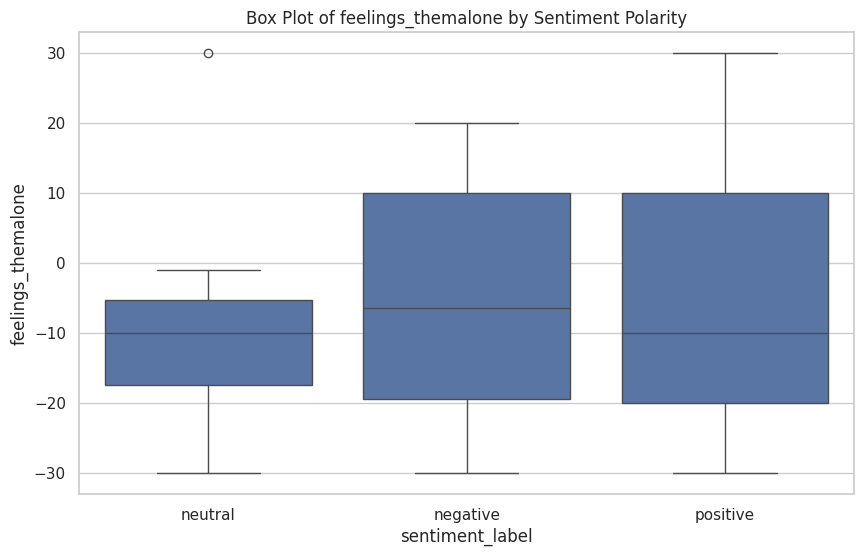

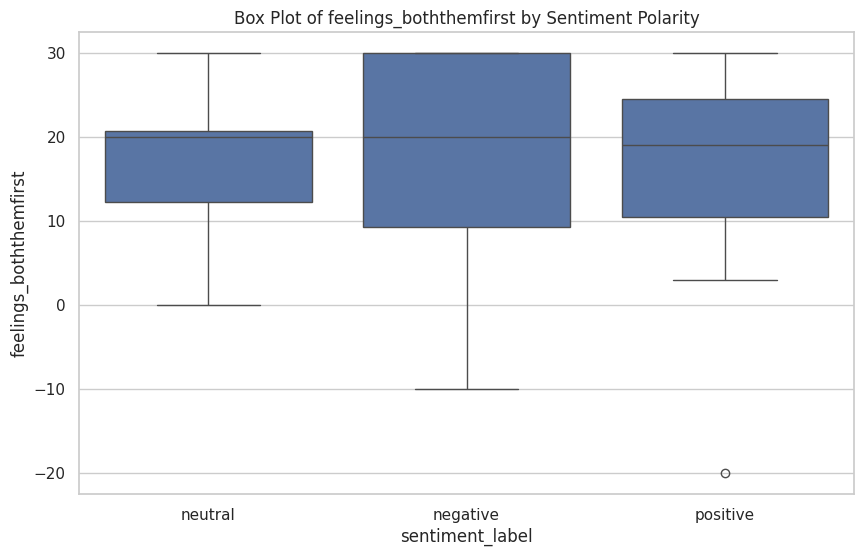

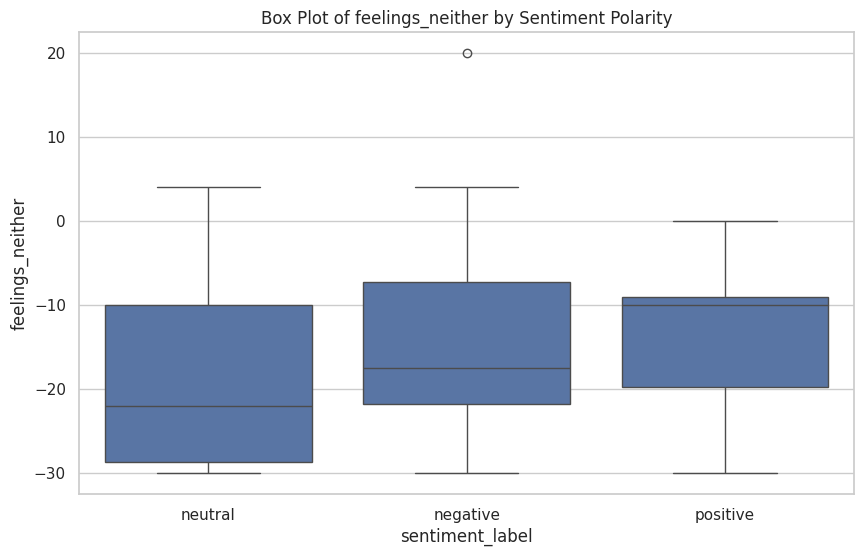

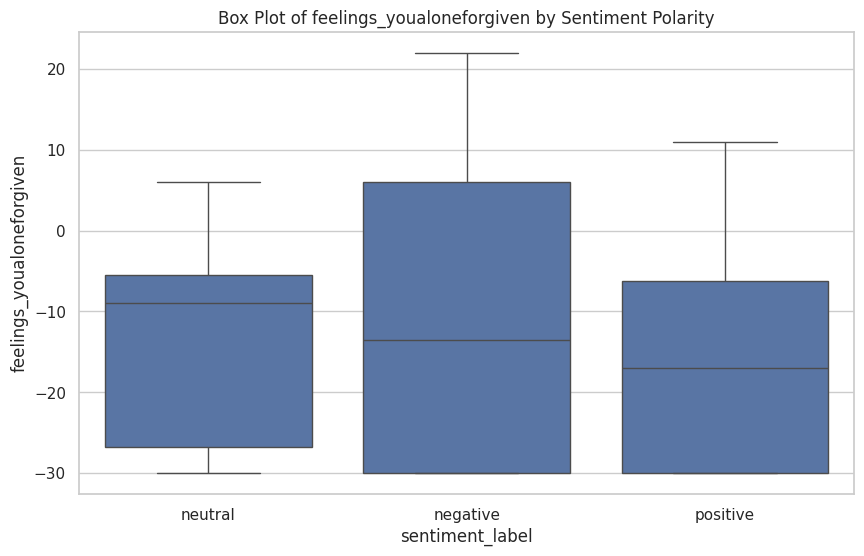

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Box plot for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='sentiment_label', y=column, data=df)
    plt.title(f'Box Plot of {column} by Sentiment Polarity')
    plt.show()
